# Section 2 : Beginners Tutorial on Robot framework

Project Structure
- *Data*
- *Output*    :   contains log that will be generated
- *Resources* :  contains resource files
- *Tests*  :  Create test cases here

Robot Framework is key driven, need to declare the key
There are 4 main sections
1. Settings : declare library to call out the keywords, and documentation
2. Keywords  :  declare keywords that contains compose layers
3. Variables  :  declare variables
4. Test Cases : write test cases

[code]
```robot
*** Test Cases ***
TEST
    Log    This is my first test
```
[/code]

TEST is a test case name

-----------------------------------------------

Running Multi Test Cases in Prompt command

 `robot <Root Directory>`


---

Output from executing a test case is going to be gerenated into 3 files
* log.html :    contains file/script were executed
* output.xml
* report.html

Specify Output Directory
`-d <folder>`

`robot -d <output_folder> <test_folder>`

### Command Line Options

**Random Running Test Cases**

```robot --randomize All <directory>```

Selecting test cases by tags
`--include (-i)`


[code]
```robot
*** Test Cases ***
TEST
    [Tags]    demo
    Log        This is my first test
```
[/code]

```
robot --randomize ALL -i demo <directory>
robot --randomize ALL -i demoANDdemo2 <directory>
robot --randomize ALL -i demoORdemo2 <directory>
```

**Setting log level**

`--loglevel (-L)`

```
robot --loglevel INFO <directory>
robot --loglevel DEBUG <directory>
robot --loglevel TRACE <directory>
```

---

### Variables

Normally, it is used to store values like Locators, password, browser name, and etc.

```robot
*** Variables ***
${MY-VARIABLE}     This is my first variable
${MY-VARIABLE2}    This is my second variable 


*** Test Cases ***
TEST
    Log        ${MY-VARIABLE}
    Log        ${MY-VARIABLE2}
```

List Type
* start with @ to declare
* start with $ to call

```robot
*** Variables ***
@{LIST}     test    test2   test3   test4


*** Test Cases ***
TEST
    Log        ${LIST}[2]
    Log        ${LIST}[0]
```

Dictionary Type
* start with & to declare
* start with $ to call

```robot
*** Variables ***
&{DICTIONARY}     username=testUser     password=demo


*** Test Cases ***
TEST
    Log        ${DICTIONARY}[username]
    Log        ${DICTIONARY}[password]
```

---

### Keywords
To contain composes

[code]
```robot
*** Keywords ***
Log My Username
    Log        ${DICTIONARY}[username]

Log My Password
    Log        ${DICTIONARY}[password]

Log Username And Password 1
    Log        ${DICTIONARY}[username]
    Log        ${DICTIONARY}[password]

Log Username And Password 2
    Log My Username
    Log My Password

*** Test Cases ***
TEST
    Log My Username
    Log My Password
    Log Username And Password 1
    Log Username And Password 2
```
[/code]

` Log Username And Password 2`

It's going to be nested composes

**Pass an argument to a keyword**

[code]
```robot
*** Keywords ***
Log My Specific Username
    [Arguments]    ${USERNAME}
    Log            ${USERNAME}

*** Variables ***
&{DICTIONARY}     username=testUser     password=demo
&{DICTIONARY2}     username=testUser2     password=demo2

*** Test Cases ***
TEST
    Log My Specific Username    ${DICTIONARY}[username]
    Log My Specific Username    ${DICTIONARY2}[username]
```
[\code]

**Pass multi arguments to a keyword**

[code]
```robot
*** Keywords ***
Log My Specific Username
    [Arguments]    ${USERNAME}
    Log            ${USERNAME}

Log My Specific Username And Password
    [Arguments]                   ${USERNAME}    ${PASSWORD}
    Log My Specific Username      ${USERNAME}
    Log                           ${PASSWORD}

*** Variables ***
&{DICTIONARY}     username=testUser     password=demo
&{DICTIONARY2}     username=testUser2     password=demo2

*** Test Cases ***
TEST
    Log My Specific Username And Password    ${DICTIONARY2}[username]    ${DICTIONARY2}[password]

```
[\code]

---

### Resource
Keep resources to use in different test case files in order to no need to write same command every time.

`Resource/resource.robot`

Then load the resource into test cases

[code]
```robot
*** Settings ***
Resource    ../Resource/resource.robot
```
[/code]

It will show where the compose was called in the output log

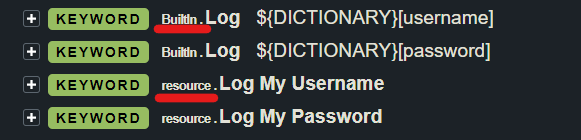

### References
#### Library
* OperatingSystem
https://robotframework.org/robotframework/latest/libraries/OperatingSystem.html

#### Keywords
* Log
https://robotframework.org/robotframework/latest/libraries/BuiltIn.html#Log

#### Tags
https://robotframework.org/robotframework/latest/RobotFrameworkUserGuide.html#tag-patterns